#### Invoke SparkContext ####

In [1]:
import findspark
findspark.init("C:/spark-3.0.0-preview2-bin-hadoop2.7")
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('Spark Lab1')
sc = SparkContext(conf=conf)
sc

<SparkContext master=local[*] appName=Spark Lab1>

### SparkSession ###

In [14]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Project") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [15]:
spark.sparkContext

<SparkContext master=local[*] appName=Spark Lab1>

#### Load data ###

In [16]:
from pyspark import SQLContext
links = spark.read.load("data/ml-latest-small/links.csv",format="csv", inferSchema="true", header="true")
links.show(10)
movies = spark.read.load("data/ml-latest-small/movies.csv",format="csv", inferSchema="true", header="true")
movies.show(10)
ratings = spark.read.load("data/ml-latest-small/ratings.csv",format="csv", inferSchema="true", header="true")
ratings.show(10)
tags = spark.read.load("data/ml-latest-small/tags.csv",format="csv", inferSchema="true", header="true")
tags.show(10)

+-------+------+------+
|movieId|imdbId|tmdbId|
+-------+------+------+
|      1|114709|   862|
|      2|113497|  8844|
|      3|113228| 15602|
|      4|114885| 31357|
|      5|113041| 11862|
|      6|113277|   949|
|      7|114319| 11860|
|      8|112302| 45325|
|      9|114576|  9091|
|     10|113189|   710|
+-------+------+------+
only showing top 10 rows

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    G

## WorldCloud of move titles

By using WorldCloud visualization we can see what certain words features more often in Movie Titles.

In [28]:
import numpy as np
import pandas as pd
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [29]:
# Reading movies file
movies_pd_test = pd.read_csv('data/ml-latest-small/movies.csv', sep=',', encoding='latin-1', usecols=['title', 'genres', 'movieId'])
movies_pd_test.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


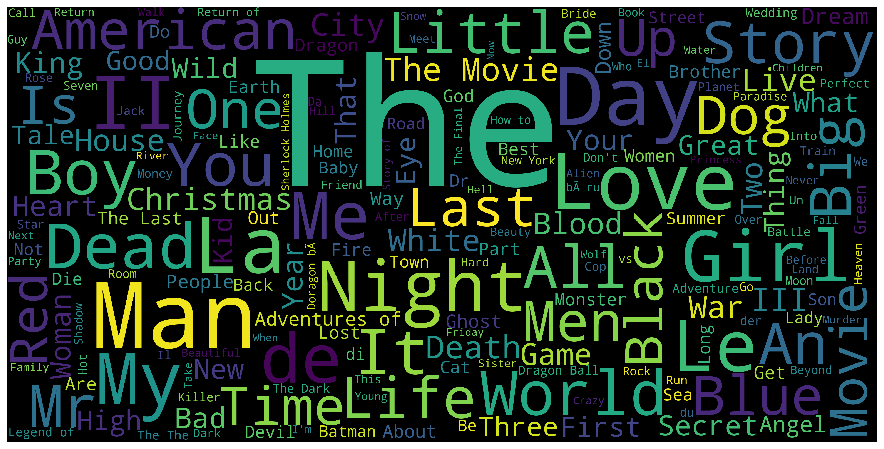

In [32]:
# Create a wordcloud of the movie titles
movies_pd_test['title'] = movies_pd_test['title'].fillna("").astype('str')
title_corpus = ' '.join(movies_pd_test['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()